## COVID-19

Date: 2020, 31 Mar

Seminar for the graduate course in Modeling and Simulation of Physical Systems [FEMT16](https://nastava.fesb.unist.hr/nastava/predmeti/11623), taught by professors Dragan Poljak and Ivica Puljak. 

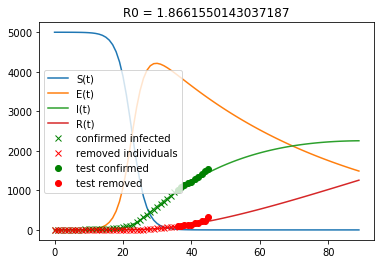

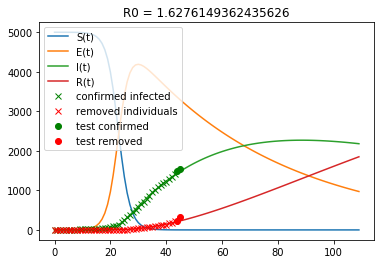

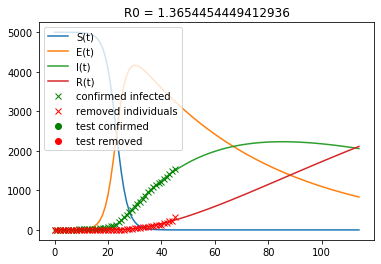

In [2]:
# libs
import numpy as np 
import matplotlib.pyplot as plt 
from covid_19.utils import train_test_split
from covid_19.compartmental_models import SEIR

# data
confirmed_cases = np.loadtxt('data/cro/confirmed_cases.dat')
recovered_cases = np.loadtxt('data/cro/recovered_cases.dat')
death_cases = np.loadtxt('data/cro/death_cases.dat')
removed_cases = recovered_cases #+ death_cases

# train-test split 
ratio = [0.80, 0.96, 1.0]
R0 = []
for r in ratio:
    train_confirmed_cases, test_confirmed_cases = train_test_split(confirmed_cases, r)
    train_removed_cases, test_removed_cases = train_test_split(removed_cases, r)

    # days since first case
    x = np.arange(len(train_confirmed_cases))

    seir = SEIR()
    initial_conditions = [5000, 0, train_confirmed_cases[0], train_removed_cases[0]]
    beta, delta, alpha, gamma = seir.fit(train_confirmed_cases, train_removed_cases, initial_conditions)
    R0.append(beta/(delta + gamma))
    n_days = int(len(train_confirmed_cases) * 2.5)
    sol = seir.predict(n_days)
    plt.plot(sol.y[0], label='S(t)')
    plt.plot(sol.y[1], label='E(t)')
    plt.plot(sol.y[2], label='I(t)')
    plt.plot(sol.y[3], label='R(t)')
    plt.plot(train_confirmed_cases, 'gx', label='confirmed infected')
    plt.plot(train_removed_cases, 'rx', label='removed individuals')
    plt.plot(np.arange(len(train_confirmed_cases), len(train_confirmed_cases)+len(test_confirmed_cases)),
        test_confirmed_cases, 'go', label='test confirmed')
    plt.plot(np.arange(len(train_removed_cases), len(train_removed_cases)+len(test_removed_cases)),
        test_removed_cases, 'ro', label='test removed')
    
    plt.title(f'R0 = {beta/(delta + gamma)}')
    plt.legend(loc='best')
    plt.show()